In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import random
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from main import set_path
from model import MS_TCN, SS_TCN
from Generator import MSTCN_gen
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset, TensorDataset


from trainer import triplet_trainer
import time


import bezier
from bezier.hazmat.curve_helpers import evaluate_hodograph, get_curvature
from sklearn.preprocessing import minmax_scale

def get_actiondict(mapping_file):
    actions_dict = {}
    with open(mapping_file, 'r') as f:
        actions = f.read().split('\n')[:-1]
    for a in actions:
        actions_dict[a.split()[1]] = int(a.split()[0])
        
    return actions_dict



## Set GPU device ##
GPU    = 0
device = torch.device("cuda:{}".format(GPU) if torch.cuda.is_available() else "cpu")
seed   = 1538574472
random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
print("Device:", device)


## Set Basic Things ##
action       = 'train'
dataset      = '50salads'
mapping_file = f'../data/{dataset}/mapping.txt'
actions_dict = get_actiondict(mapping_file)
num_classes  = len(actions_dict)
batch_size   = 1
split        = '4'
op           = 'residual'
method       = 'triplet'
step         = 8

margin = 10.
lr = 0.005
num_epochs = 30
if dataset  == "50salads": sample_rate = 2
else: sample_rate=1


vid_list_file, features_path, gt_path, _, _, _ = set_path(dataset, 'train', '4', op, method)
batch_gen = MSTCN_gen(num_classes, actions_dict, gt_path, features_path, sample_rate, method)
batch_gen.read_data(vid_list_file)

Device: cuda:0


In [3]:
import bezier
def embeddings3d_plot(embeddings, batch_target, name, step):
    fig = plt.figure(figsize=(10,10))
#     fig.suptitle(f"Embedding Plot: {name}")
    ax = fig.add_subplot(projection='3d')
    labels = np.array(batch_target.squeeze())
    frames = embeddings.shape[1]
    index = np.arange(0, frames, step)


    for i in index:
        c1 = colors[labels[i]]
        ax.scatter(
            embeddings[0, i],    # x-coordinates.
            embeddings[1, i],    # y-coordinates.
            embeddings[2, i],    # z-coordinates.
            s = 10,
            color=c1

        )
    plt.savefig(f'./fig//ablation/pca/{name}.jpeg')
#     plt.show()
#     plt.close()

rgb-15-1 torch.Size([5745, 2048]) (3, 5745)


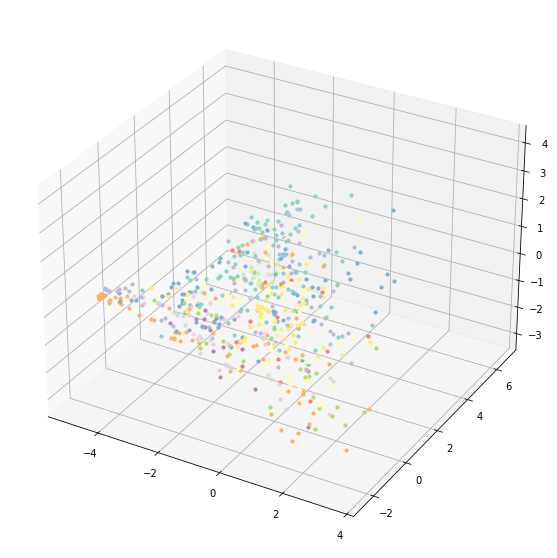

rgb-14-2 torch.Size([4113, 2048]) (3, 4113)


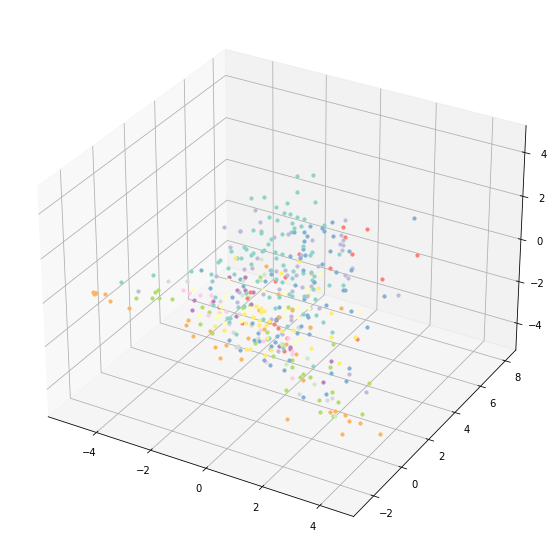

rgb-01-1 torch.Size([5840, 2048]) (3, 5840)


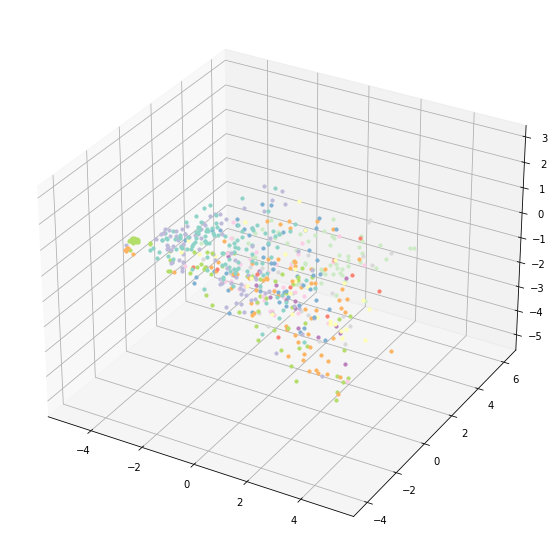

rgb-05-1 torch.Size([5558, 2048]) (3, 5558)


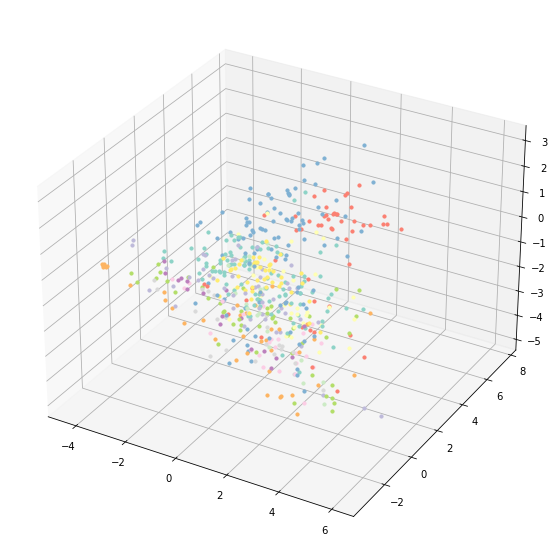

rgb-15-2 torch.Size([6981, 2048]) (3, 6981)


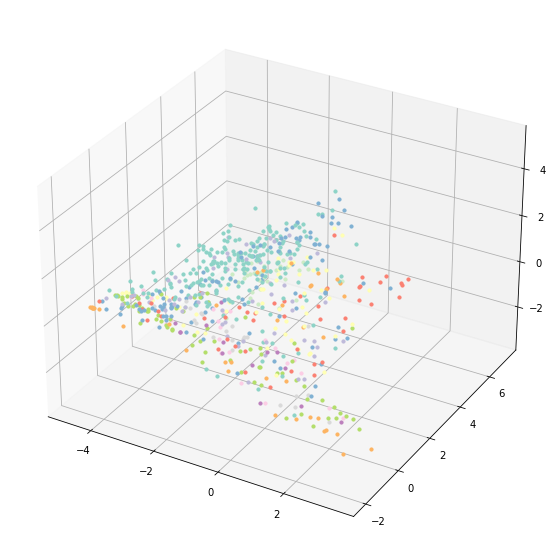

rgb-13-2 torch.Size([6546, 2048]) (3, 6546)


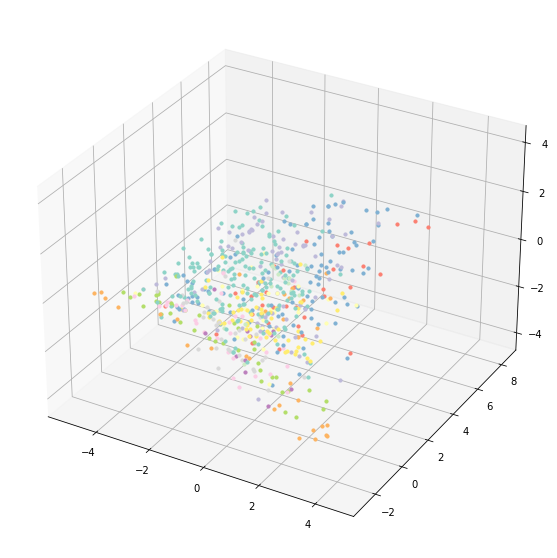

rgb-27-2 torch.Size([6020, 2048]) (3, 6020)


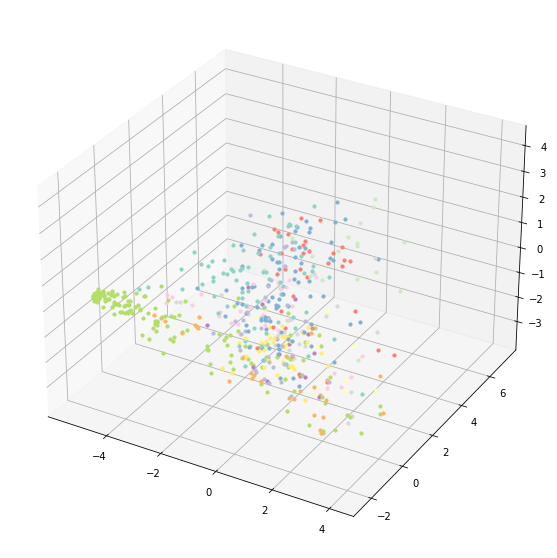

rgb-09-1 torch.Size([5774, 2048]) (3, 5774)


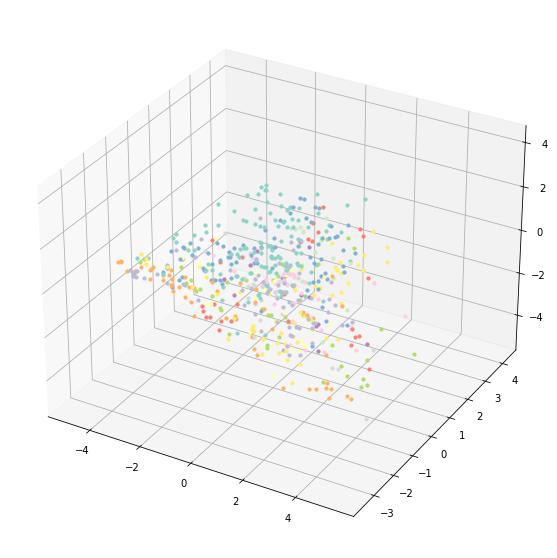

rgb-11-2 torch.Size([4227, 2048]) (3, 4227)


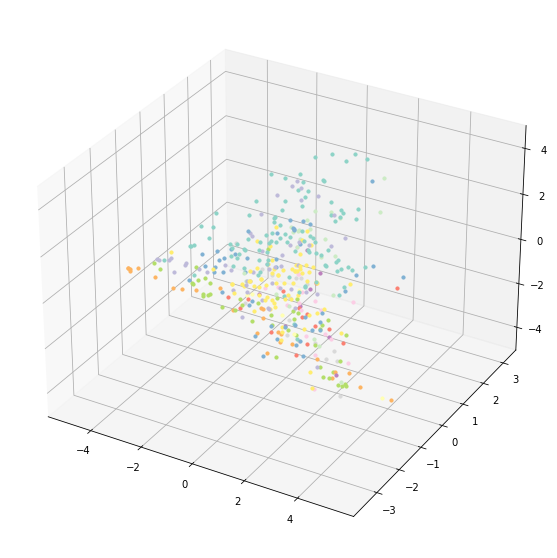

rgb-13-1 torch.Size([6940, 2048]) (3, 6940)


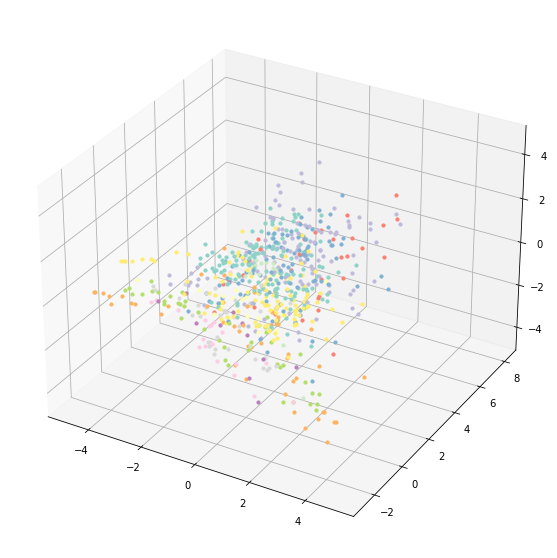

rgb-11-1 torch.Size([4718, 2048]) (3, 4718)


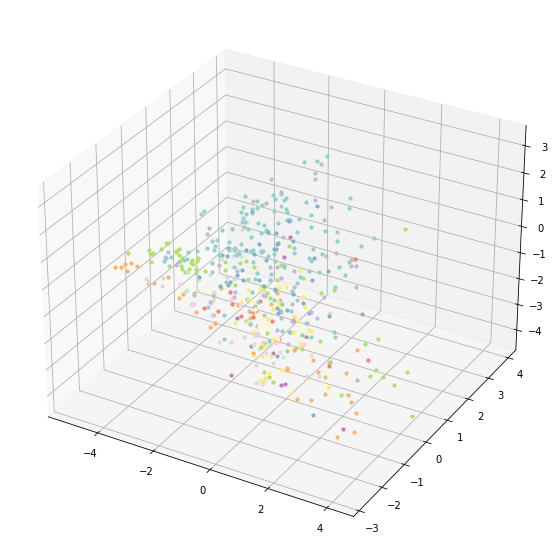

rgb-02-2 torch.Size([5261, 2048]) (3, 5261)


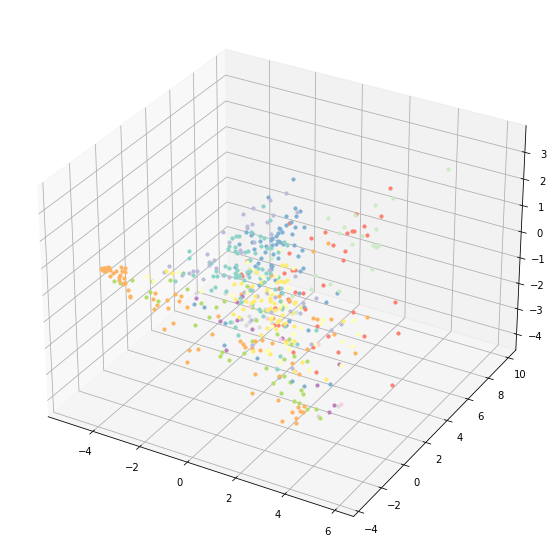

rgb-09-2 torch.Size([7145, 2048]) (3, 7145)


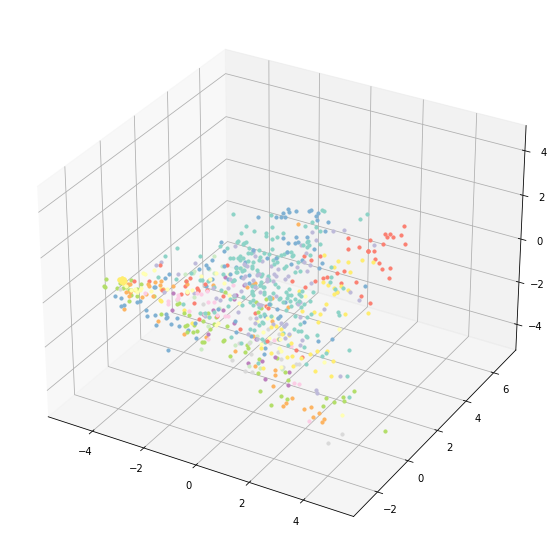

rgb-16-2 torch.Size([5211, 2048]) (3, 5211)


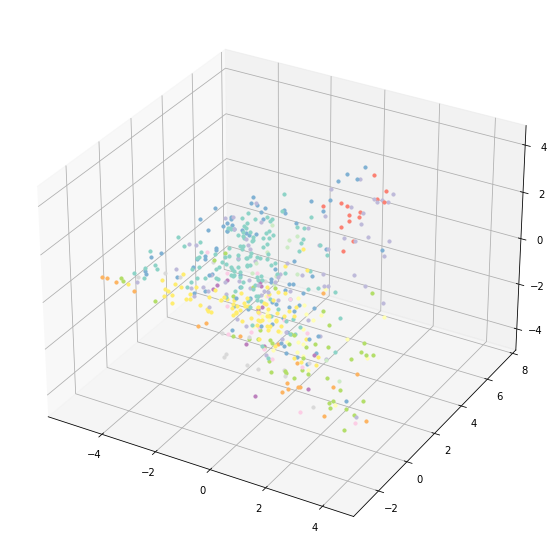

rgb-25-1 torch.Size([5580, 2048]) (3, 5580)


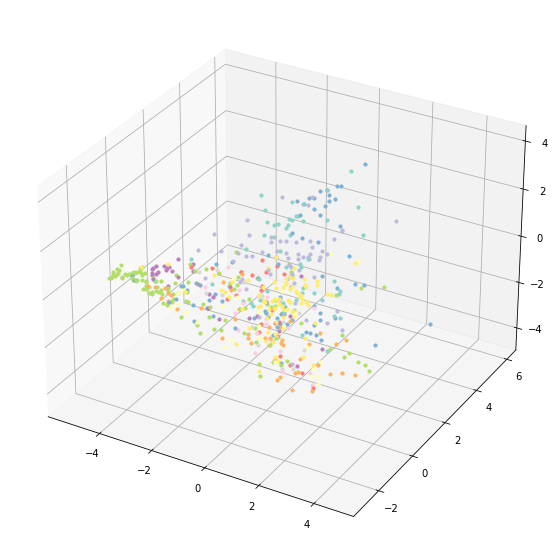

rgb-06-1 torch.Size([4847, 2048]) (3, 4847)


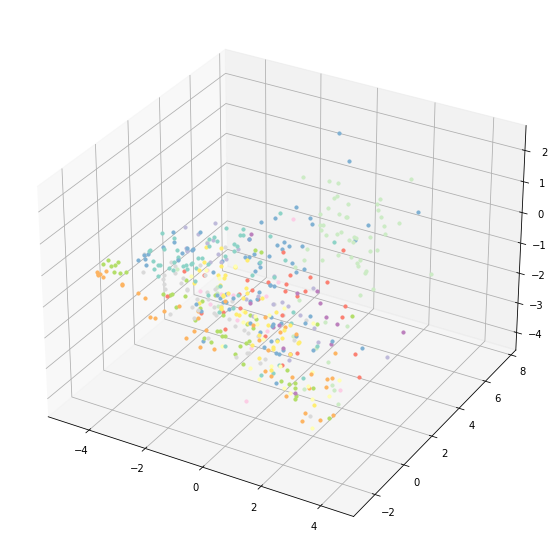

rgb-04-2 torch.Size([6186, 2048]) (3, 6186)


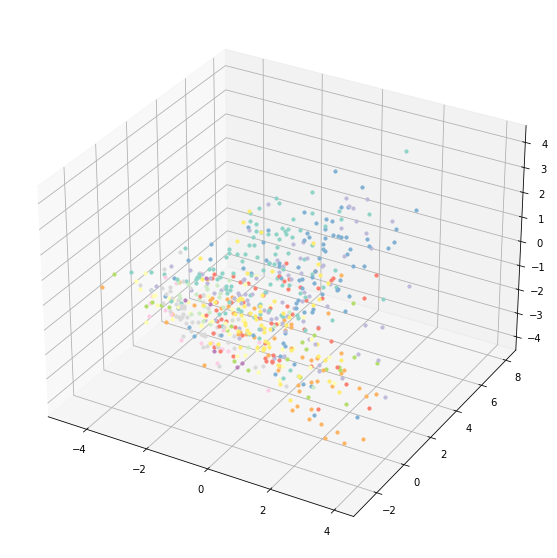

rgb-14-1 torch.Size([4300, 2048]) (3, 4300)


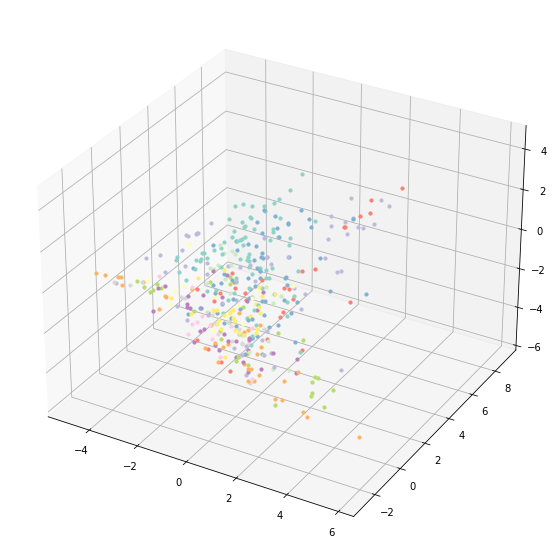

rgb-26-1 torch.Size([4563, 2048]) (3, 4563)


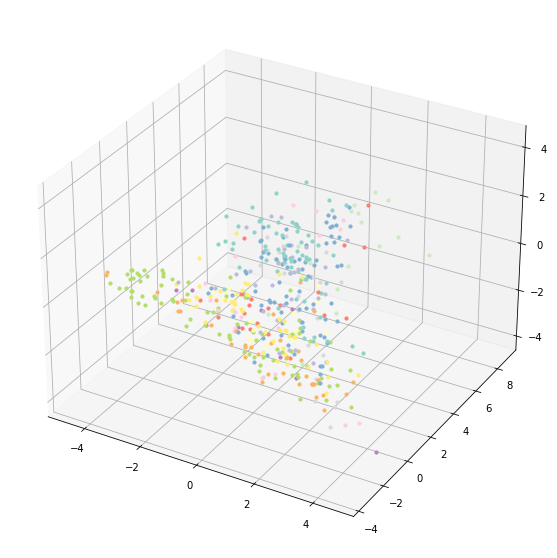

rgb-17-1 torch.Size([5573, 2048]) (3, 5573)


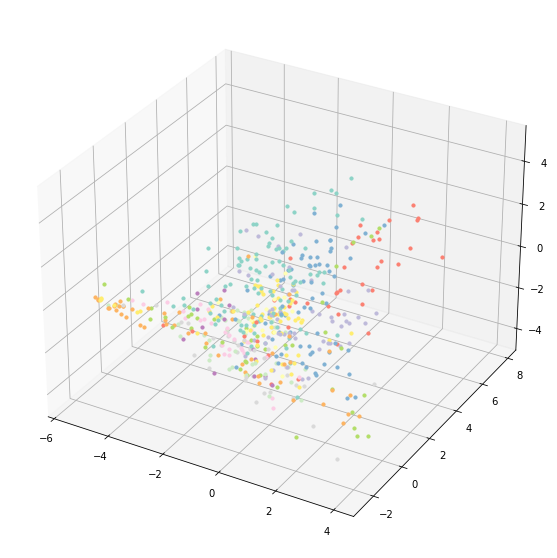

rgb-25-2 torch.Size([4182, 2048]) (3, 4182)


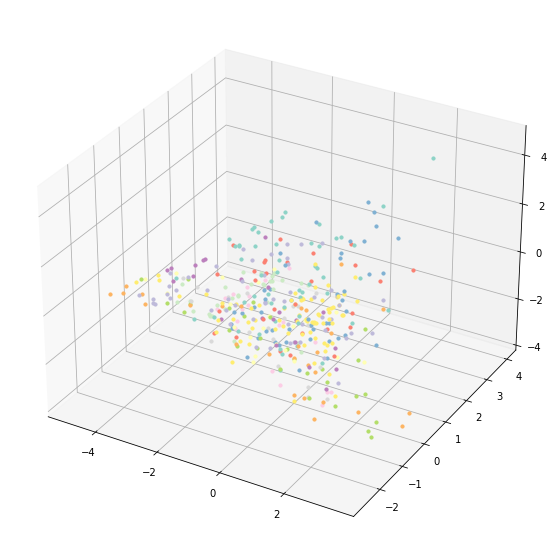

rgb-07-2 torch.Size([7546, 2048]) (3, 7546)


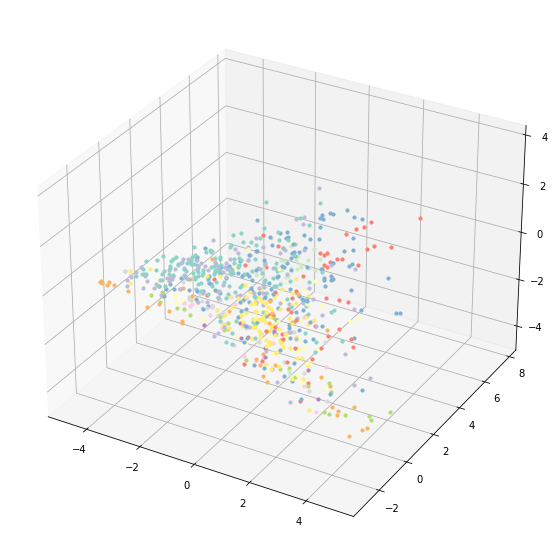

rgb-03-1 torch.Size([5687, 2048]) (3, 5687)


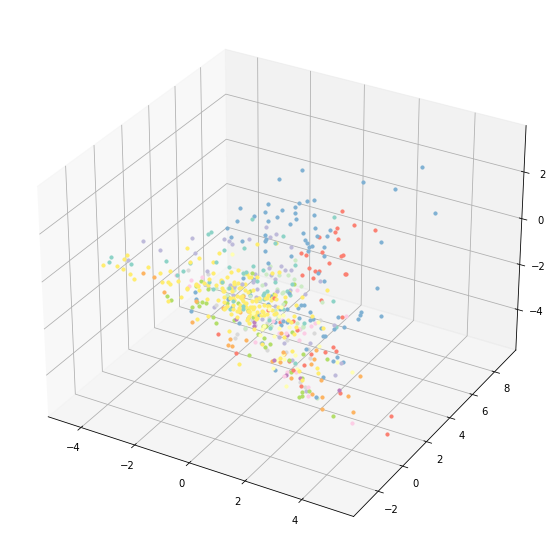

rgb-17-2 torch.Size([6472, 2048]) (3, 6472)


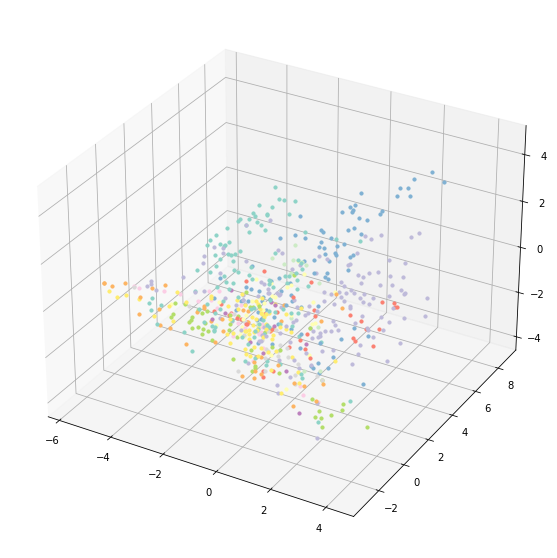

rgb-06-2 torch.Size([4115, 2048]) (3, 4115)


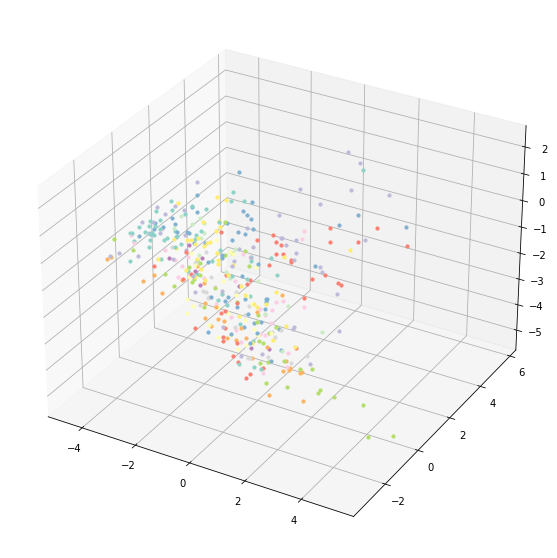

rgb-23-2 torch.Size([7316, 2048]) (3, 7316)


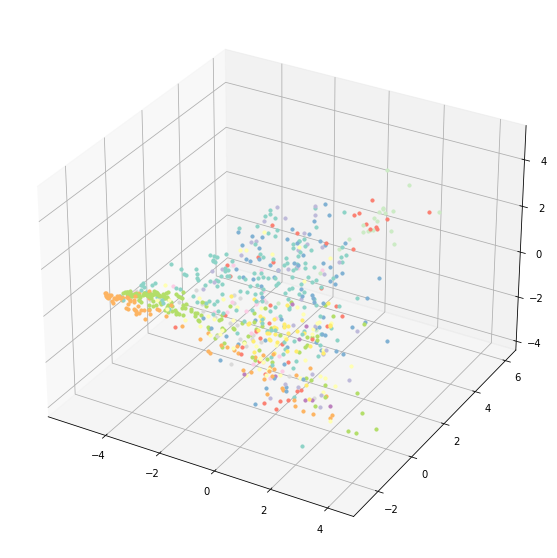

rgb-01-2 torch.Size([6293, 2048]) (3, 6293)


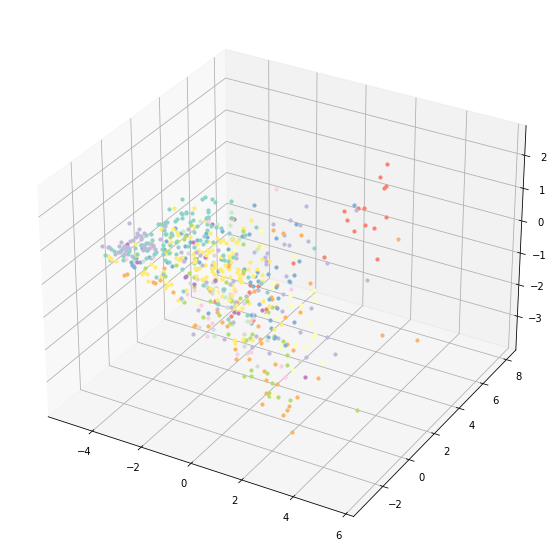

rgb-27-1 torch.Size([5930, 2048]) (3, 5930)


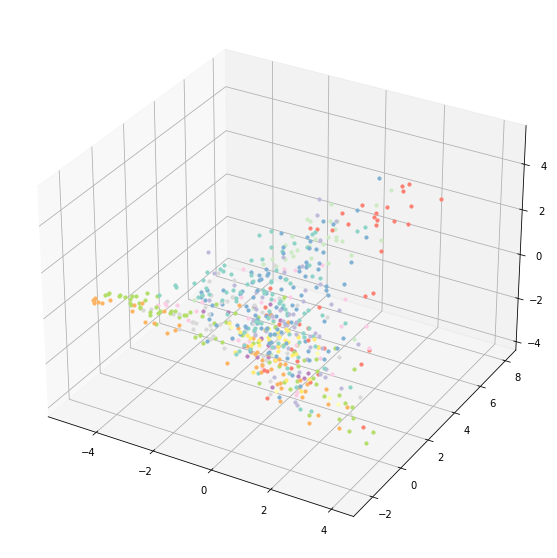

rgb-10-2 torch.Size([4547, 2048]) (3, 4547)


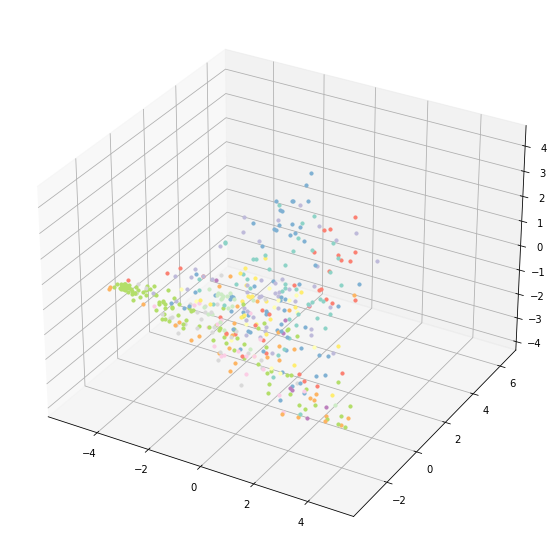

rgb-16-1 torch.Size([6433, 2048]) (3, 6433)


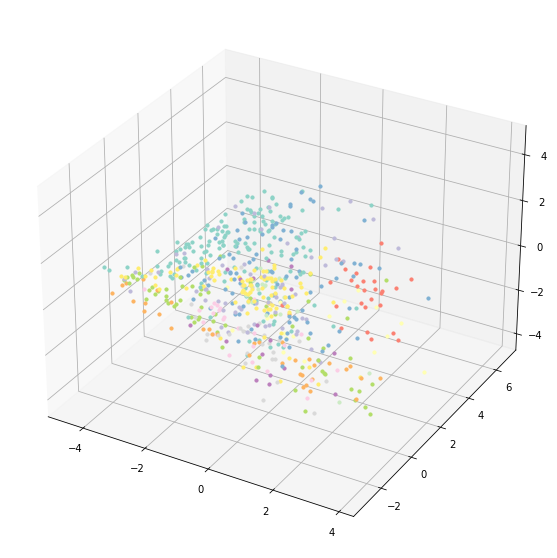

rgb-02-1 torch.Size([6208, 2048]) (3, 6208)


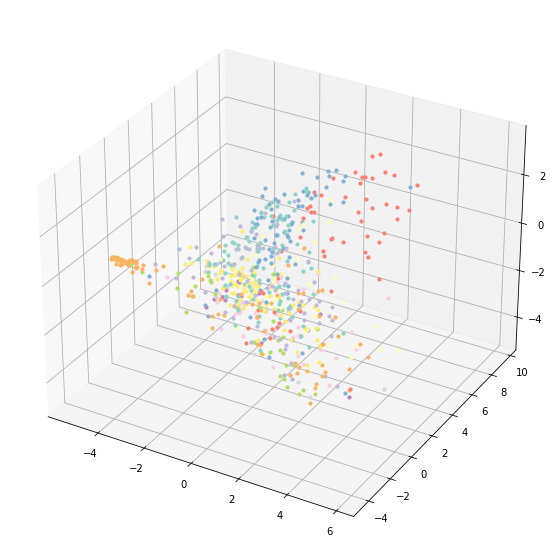

rgb-04-1 torch.Size([6584, 2048]) (3, 6584)


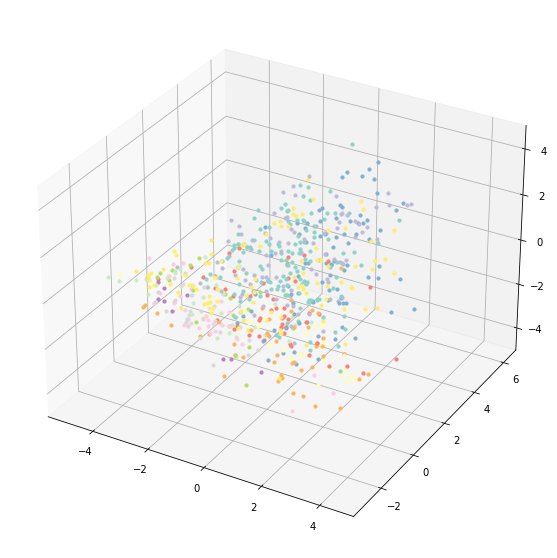

rgb-24-1 torch.Size([6106, 2048]) (3, 6106)


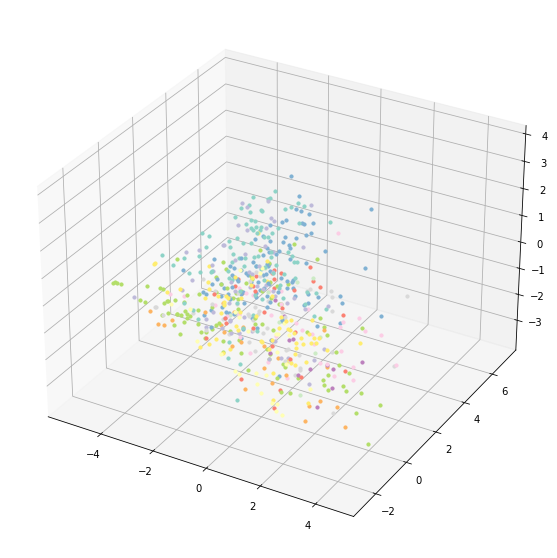

rgb-24-2 torch.Size([3902, 2048]) (3, 3902)


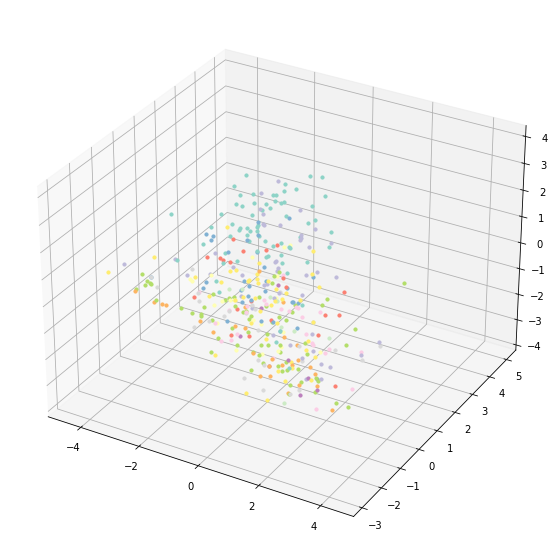

rgb-05-2 torch.Size([6046, 2048]) (3, 6046)


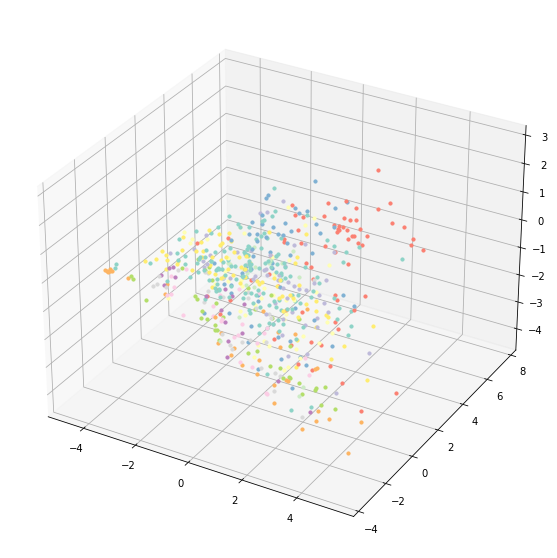

rgb-07-1 torch.Size([8897, 2048]) (3, 8897)


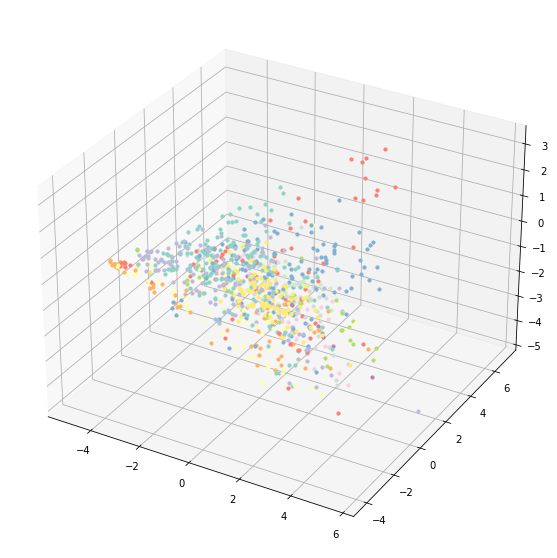

rgb-03-2 torch.Size([5792, 2048]) (3, 5792)


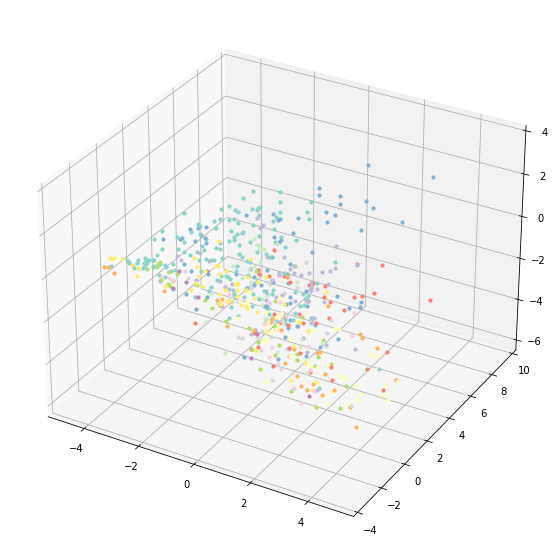

rgb-23-1 torch.Size([6637, 2048]) (3, 6637)


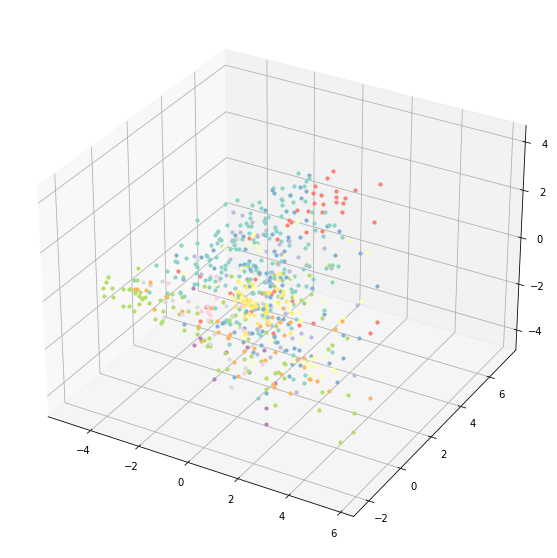

rgb-26-2 torch.Size([4610, 2048]) (3, 4610)


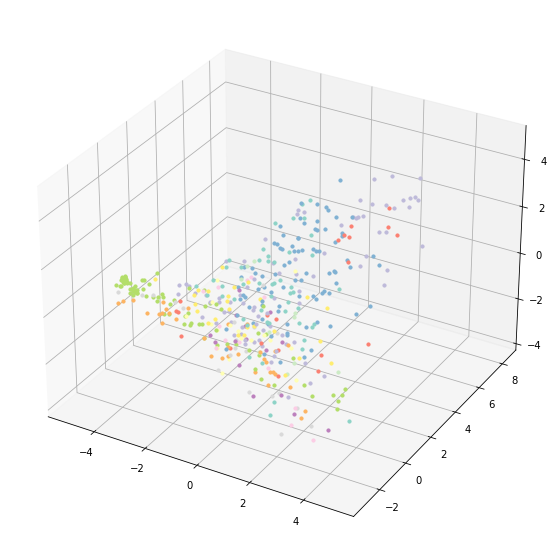

rgb-10-1 torch.Size([6165, 2048]) (3, 6165)


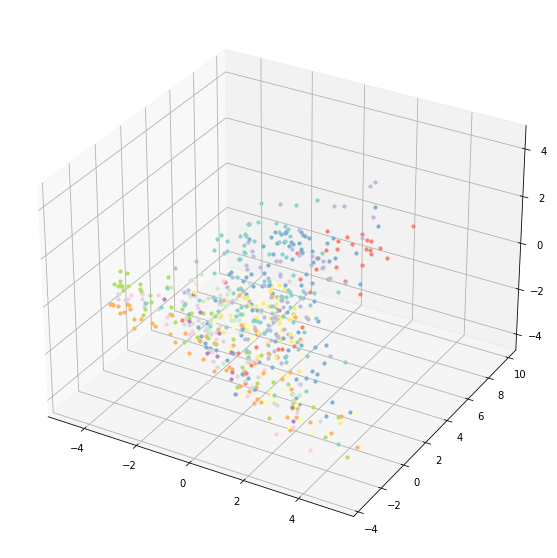

In [4]:
colors  = sns.color_palette("Set3",len(actions_dict)) ## 색상 지정

while batch_gen.has_next():
        batch_input, batch_target, mask, name = batch_gen.next_batch(1)

        name        = name[0][:-4]

        
        batch_input = batch_input.T.squeeze().to(device)
        frames      = batch_input.shape[0]
        step        = 10
        index       = np.arange(0, frames, step)
        
        pca   = np.load(f'../data/{dataset}/pca/{name}.npy')
        print(name, batch_input.shape, pca.shape)
        embeddings3d_plot(pca, batch_target, name, step)
#         break